In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [14]:
data = pd.read_excel("cal_housing.xlsx")

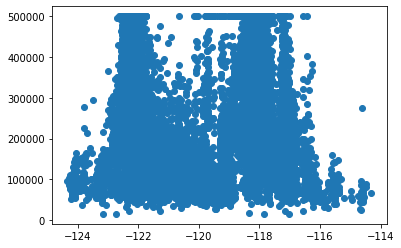

In [3]:
plt.figure()
plt.scatter(data.iloc[:,0],data.iloc[:,8])

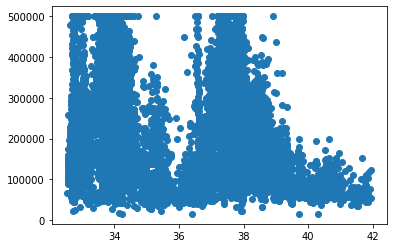

In [4]:
plt.figure()
plt.scatter(data.iloc[:,1],data.iloc[:,8])

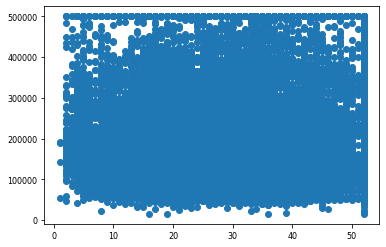

In [27]:
plt.figure()
plt.scatter(data.iloc[:,2],data.iloc[:,8])

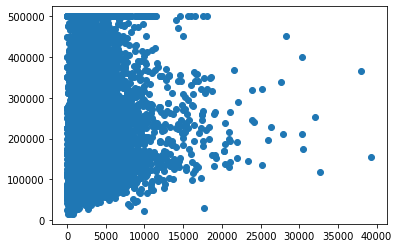

In [6]:
plt.figure()
plt.scatter(data.iloc[:,3],data.iloc[:,8])

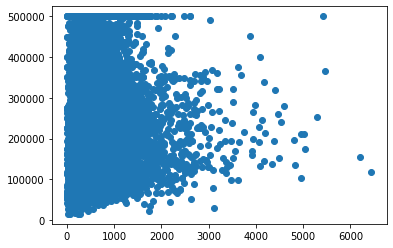

In [7]:
plt.figure()
plt.scatter(data.iloc[:,4],data.iloc[:,8])

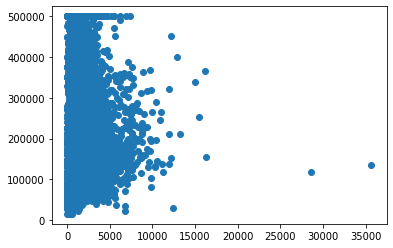

In [8]:
plt.figure()
plt.scatter(data.iloc[:,5],data.iloc[:,8])

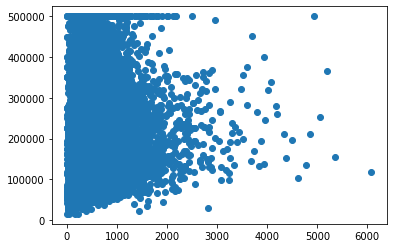

In [9]:
plt.figure()
plt.scatter(data.iloc[:,6],data.iloc[:,8])

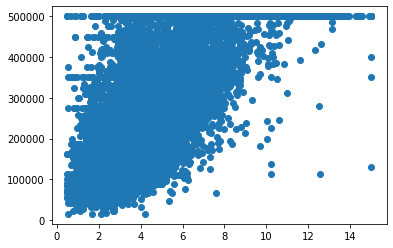

In [10]:
plt.figure()
plt.scatter(data.iloc[:,7],data.iloc[:,8])

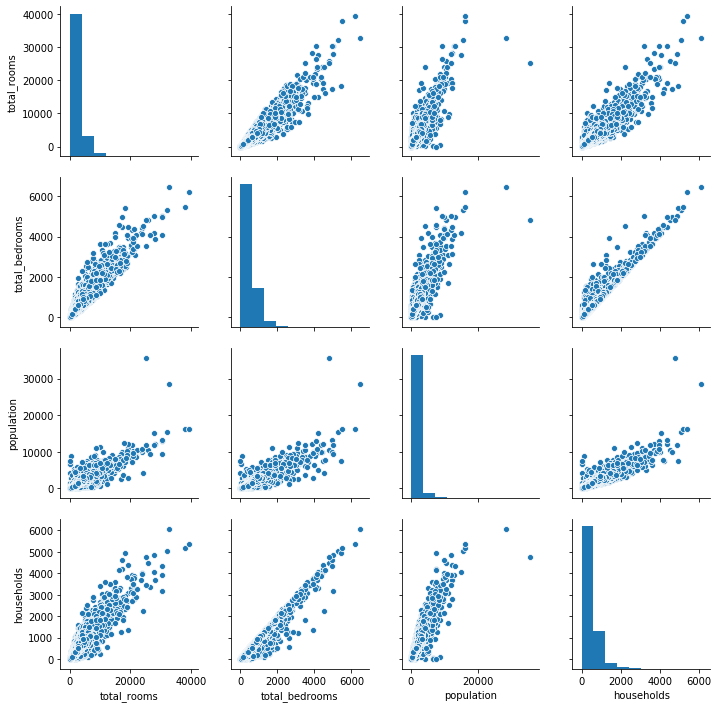

In [7]:
g = sns.pairplot(data.iloc[:,3:7])
g.savefig("pairplot.png")

In [15]:
n = 20640
n_train = 12384
n_test = 8256

In [16]:
np.random.seed(1)
index = np.arange(n)
np.random.shuffle(index) 
index_train = index[:n_train] 
index_test = index[n_train:]

In [17]:
#generate data set
D_train = data.loc[index_train,:]
D_test = data.loc[index_test,:]

In [18]:
X_train = np.array(D_train.iloc[:,0:8])
#X_train = np.hstack((np.ones(n_train).reshape(n_train,1),X_train))
y_train = np.log(np.array(D_train.iloc[:,8]))
X_test = np.array(D_test.iloc[:,0:8])
#X_test = np.hstack((np.ones(n_test).reshape(n_test,1),X_test))
y_test = np.log(np.array(D_test.iloc[:,8]))

In [78]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
#Task 1: multicolinearity
#No standarization

K = np.linalg.eig(X_train.T.dot(X_train))[0]

In [13]:
K

array([1.93093502e+11, 3.85730114e+09, 3.94533586e+08, 7.72137633e+07,
       3.59079046e+07, 1.54201769e+06, 2.19290978e+04, 3.65042314e+04])

In [14]:
#condition number
cdtNum = np.max(K)/np.min(K)
cdtNum

8805355.47641647

In [18]:
#with scaling


In [19]:
Xs_train = preprocessing.scale(D_train.iloc[:,0:8])/np.sqrt(n_train)
Xs_test = preprocessing.scale(D_test.iloc[:,0:8])/np.sqrt(n_test)

In [20]:
ys_train = preprocessing.scale(np.log(D_train.iloc[:,8]))/np.sqrt(n_train)
ys_test = preprocessing.scale(np.log(D_test.iloc[:,8]))/np.sqrt(n_test)

In [21]:
np.mean(np.log(D_train.iloc[:,8]))


12.081635646622281

In [22]:
K = np.linalg.eig(Xs_train.T.dot(Xs_train))[0]
cdtNum = np.max(K)/np.min(K)
cdtNum

252.31278536151336

In [23]:
#multiple linear regression

beta1 = np.linalg.inv(Xs_train.T.dot(Xs_train)).dot(Xs_train.T).dot(ys_train)

In [24]:
beta1

array([-0.97583031, -1.05739611,  0.07321876, -0.13234905,  0.36913081,
       -0.32760159,  0.15126816,  0.59143277])

In [25]:
yhat_train = Xs_train.dot(beta1)

In [26]:
SST = np.sum((ys_train-np.mean(ys_train))**2)
SSRes = np.sum((ys_train-yhat_train)**2)
R2 = 1 - SSRes/SST
R2

0.6388941783461063

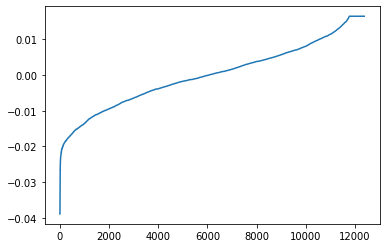

In [23]:
plt.plot(np.sort(ys_train))

In [27]:
p = 8

In [28]:
R2_adj = 1-SSRes/(n_train-p)/(SST/(n_train-1))
R2_adj

0.6386899329718676

In [28]:
#test MSE

yhat_test = Xs_test.dot(beta1.reshape(8,1))
MSE = (1/n_test)*np.sum((ys_test-yhat_test)**2)
MSE

#how to measure the performance???

1.6356116348846934

In [27]:
np.shape(beta1)

(8,)

In [29]:
#R-student residuals

#compute ei
ei_train = (ys_train - yhat_train).reshape(n_train,1)

In [30]:
#compute hii

H_train = Xs_train.dot(np.linalg.inv(Xs_train.T.dot(Xs_train))).dot(Xs_train.T)

Hii_train = np.diagonal(H_train).reshape(n_train,1)

In [31]:
#compute S2_i

S2_i = ((SSRes - ei_train**2)/(1-Hii_train))/(n_train-p-1)

In [32]:
np.shape(ei_train)

(12384, 1)

In [32]:
#R-student residuals

ti = ei_train/np.sqrt(S2_i*(1-Hii_train))

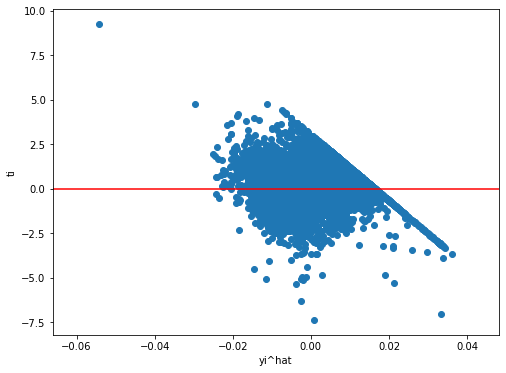

In [37]:
#plot R-student residuals

plt.figure(figsize = (8,6))

plt.scatter(yhat_train.reshape(n_train,1),ti)
plt.xlabel("yi^hat")
plt.ylabel('ti')
plt.axhline(y=0,c="red")
plt.savefig("rstplot.png")

In [33]:
#outlier

##student residuals

MSRes = SSRes/(n_train-p)
ri = ei_train/np.sqrt(1-Hii_train)

In [34]:
#cook's measure

Di = (ri**2/p)*(Hii_train/(1-Hii_train))

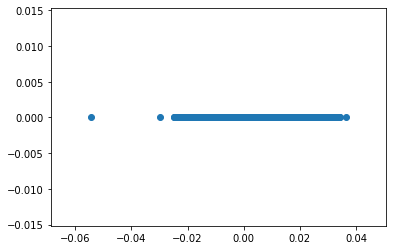

In [42]:
plt.scatter(yhat_train,Di)

In [45]:
outliers=[]

for i in Di:
    if i > (4/n_train):
        outliers.append(i)
outliers

[]

In [36]:
# DFFITS

DFFITS = np.sqrt(Hii_train/(1-Hii_train))*ti

outliers1=[]

for i in DFFITS:
    if i > 2*np.sqrt(p/n_train):
        outliers1.append(i)
outliers1

[array([0.09197852]),
 array([0.13168929]),
 array([0.08742976]),
 array([0.05369453]),
 array([0.09462826]),
 array([0.11050288]),
 array([0.12785511]),
 array([0.05371974]),
 array([0.13866449]),
 array([0.06395767]),
 array([0.06531152]),
 array([0.121534]),
 array([0.06873436]),
 array([0.05525777]),
 array([0.06947004]),
 array([0.07270507]),
 array([0.07950088]),
 array([0.05294889]),
 array([0.08483338]),
 array([0.07420878]),
 array([0.06312113]),
 array([0.05392315]),
 array([0.05602757]),
 array([0.06717536]),
 array([0.08296477]),
 array([0.15999349]),
 array([0.08187243]),
 array([0.08596448]),
 array([0.05300178]),
 array([0.06249637]),
 array([0.05291445]),
 array([0.08954787]),
 array([0.08317727]),
 array([0.06539006]),
 array([0.05259911]),
 array([0.05738293]),
 array([0.06389739]),
 array([0.11592148]),
 array([0.08979854]),
 array([0.10438144]),
 array([0.09965372]),
 array([0.0608324]),
 array([0.05346964]),
 array([0.11495172]),
 array([0.05472241]),
 array([0.056

In [39]:
outliers1

[array([0.09197852]),
 array([0.13168929]),
 array([0.08742976]),
 array([0.05369453]),
 array([0.09462826]),
 array([0.11050288]),
 array([0.12785511]),
 array([0.05371974]),
 array([0.13866449]),
 array([0.06395767]),
 array([0.06531152]),
 array([0.121534]),
 array([0.06873436]),
 array([0.05525777]),
 array([0.06947004]),
 array([0.07270507]),
 array([0.07950088]),
 array([0.05294889]),
 array([0.08483338]),
 array([0.07420878]),
 array([0.06312113]),
 array([0.05392315]),
 array([0.05602757]),
 array([0.06717536]),
 array([0.08296477]),
 array([0.15999349]),
 array([0.08187243]),
 array([0.08596448]),
 array([0.05300178]),
 array([0.06249637]),
 array([0.05291445]),
 array([0.08954787]),
 array([0.08317727]),
 array([0.06539006]),
 array([0.05259911]),
 array([0.05738293]),
 array([0.06389739]),
 array([0.11592148]),
 array([0.08979854]),
 array([0.10438144]),
 array([0.09965372]),
 array([0.0608324]),
 array([0.05346964]),
 array([0.11495172]),
 array([0.05472241]),
 array([0.056

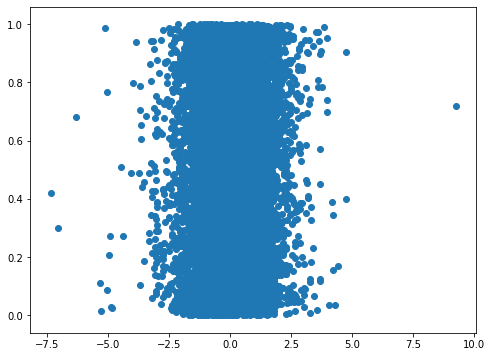

In [36]:
#normal probability plot

Pi = (np.arange(1,n_train+1)-0.5)/n_train

plt.figure(figsize = (8,6))

plt.scatter(np.sort(ti),Pi)

plt.savefig("nmplot.png")

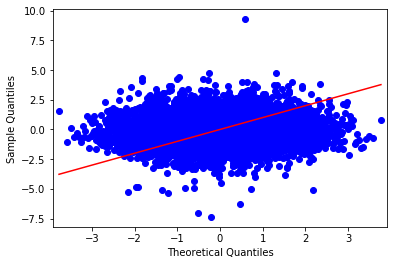

In [85]:
#qq-plot
import statsmodels.api as sm
import pylab
sm.qqplot(ti, line='s')
pylab.show()

In [39]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [40]:
#With scaling

degree = 2

poly = PolynomialFeatures(degree)
X_ = poly.fit_transform(Xs_train)

Y_ = ys_train
model = LinearRegression(fit_intercept=True)
model.fit(X_, Y_)
print(model.coef_)

[-7.68143384e-15 -1.16020219e+00 -1.29122824e+00  8.39809936e-02
 -4.94789799e-01  6.73412337e-01 -4.71866895e-01  3.03022406e-01
  8.06159609e-01  1.44218661e+01  4.80335564e+01 -2.67831808e+01
  5.76921005e+01 -2.57201020e+01  6.55537923e+00 -3.65964531e+01
 -8.54408314e+00  3.38702780e+01 -3.09217551e+01  6.87551170e+01
 -4.28096101e+01  8.48595866e+00 -3.30852175e+01 -8.92626428e+00
  2.58198218e+00 -7.72368422e+00  5.94674026e+00 -1.41831292e+01
  1.84572486e+01  1.61638021e+00 -4.39581640e+00  1.82883344e+01
 -1.72652201e+01  1.15198765e+01  2.10690148e+01 -2.13864954e+01
  2.14996399e+01 -4.96391605e+00 -2.22237889e+01  2.98792739e+00
 -9.72395414e+00  6.12048170e+00  3.47270648e+00  1.72719636e+00
 -1.14373507e+01]


In [41]:
np.shape(model.coef_)

(45,)

In [42]:
beta2 = model.coef_.reshape(45,1)
np.shape(beta2)

(45, 1)

In [43]:
#with scaling

X_test1 = poly.fit_transform(Xs_test)

In [44]:
yhat_test1 = X_test1.dot(beta2)
MSE = (1/n_test)*np.sum(((ys_test)-yhat_test1)**2)
MSE

1.7136163369556479

In [45]:
yhat_test1 = X_test1.dot(beta2)

In [46]:
model.score(X_,Y_)

0.7181219960542704

In [47]:
SST = np.sum((ys_test-np.mean(ys_test))**2)
SSRes = np.sum((ys_test.reshape(n_test,1)-yhat_test1)**2)

R2 = 1-SSRes/SST
R2

0.7063472147495055

In [48]:
R2_adj = 1-SSRes/(n_train-p)/(SST/(n_train-1))
R2_adj

0.7061811215451783

In [49]:
#add L2 regulirization

from sklearn.linear_model import Ridge

In [50]:
np.shape(X_)

(12384, 45)

In [53]:
clf = Ridge(alpha=0.01)
clf.fit(X_, ys_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
X_ = poly.fit_transform(Xs_train)
clf.score(X_, ys_train)

0.6410869456985444

In [55]:
##R2_adj

clf.score(X_, ys_train)*((n_train-1)/(n_train-p))+1-((n_train-1)/(n_train-p))

0.6408839405773332

In [232]:
beta3 = clf.coef_.reshape(45,1)

In [233]:
np.shape(beta3)

(45, 1)

In [234]:
np.shape(beta2)

(45, 1)

In [235]:
X_test2 = poly.fit_transform(Xs_test)
yhat_test2 = X_test2.dot(beta3)
MSE = (1/n_test)*np.sum(((ys_test)-yhat_test2)**2)
MSE

1.6365608180619147

In [7]:
X_train = np.array(D_train.iloc[:,0:8])
#X_train = np.hstack((np.ones(n_train).reshape(n_train,1),X_train))
y_train = np.array(D_train.iloc[:,8])
X_test = np.array(D_test.iloc[:,0:8])
#X_test = np.hstack((np.ones(n_test).reshape(n_test,1),X_test))
y_test = np.array(D_test.iloc[:,8])

In [10]:
x = np.array(data.iloc[:,0:8])
y = np.array(data.iloc[:,8])

In [8]:
#data preparation
x_ = []
for i in X_train.T[:,0:2000]:
    x_.append(i)


In [9]:
y = y_train[0:2000]


In [10]:
from ace import model
myace = model.Model()

In [11]:
myace.build_model_from_xy(x_, y)

* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  3.81725E-01
  Starting inner iteration 002. Current err =  3.13413E-01
  Starting inner iteration 003. Current err =  3.01821E-01
  Starting inner iteration 004. Current err =  2.97321E-01
  Starting inner iteration 005. Current err =  2.93266E-01
  Starting inner iteration 006. Current err =  2.89876E-01
  Starting inner iteration 007. Current err =  2.86686E-01
  Starting inner iteration 008. Current err =  2.84209E-01
  Starting inner iteration 009. Current err =  2.82304E-01
  Starting inner iteration 010. Current err =  2.80246E-01
  Starting inner iteration 011. Current err =  2.78640E-01
  Starting inner iteration 012. Current err =  2.77307E-01
  Starting inner iteration 013. Current err =  2.76818E-01
* Starting outer iteration 001. Current err =  2.62915E-01
  Starting inner iteration 000. Current err =  2.62915E-

  Starting inner iteration 002. Current err =  2.23452E-01
  Starting inner iteration 003. Current err =  2.23414E-01
  Starting inner iteration 004. Current err =  2.23327E-01
  Starting inner iteration 005. Current err =  2.23253E-01
  Starting inner iteration 006. Current err =  2.23214E-01
  Starting inner iteration 007. Current err =  2.23153E-01
  Starting inner iteration 008. Current err =  2.23086E-01
  Starting inner iteration 009. Current err =  2.23069E-01
  Starting inner iteration 010. Current err =  2.23039E-01
  Starting inner iteration 011. Current err =  2.22929E-01
  Starting inner iteration 012. Current err =  2.22887E-01
  Starting inner iteration 013. Current err =  2.22836E-01
  Starting inner iteration 014. Current err =  2.22774E-01
  Starting inner iteration 015. Current err =  2.22747E-01
  Starting inner iteration 016. Current err =  2.22733E-01
  Starting inner iteration 017. Current err =  2.22721E-01
  Starting inner iteration 018. Current err =  2.22712E-

In [ ]:
np.shape(y)

In [41]:
np.shape(y1)

(200,)

In [12]:
from ace import ace
#ace.plot_transforms(myace, fname = 'mytransforms.pdf')
myace.ace.write_transforms_to_file(fname = 'mytransforms.txt')

In [17]:
df1 = []
with open('mytransforms.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df1.append(temp)

(2000, 9)

In [38]:
df2 = np.array(df1).astype(np.float64)

In [43]:
X = df2[:,1:]

In [45]:
np.shape(X)

(2000, 8)

In [46]:
X = np.hstack((np.ones(2000).reshape(2000,1),X))

In [47]:
Y = df2[:,0]

In [48]:
beta4 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [49]:
beta4

array([-6.74409053e-12,  1.04353907e+00,  1.04337583e+00,  9.52229497e-01,
        9.30014332e-01,  1.21821947e+00,  1.02917559e+00,  9.67228304e-01,
        1.01533445e+00])

In [50]:
Yhat = X.dot(beta4)

In [51]:
Yhat

array([ 1.01235298, -1.34701505,  0.38017497, ...,  1.41688377,
       -0.27975277, -0.02777713])

In [52]:
SST = np.sum((Y-np.mean(Y))**2)
SSRes = np.sum((Y-Yhat)**2)

In [55]:
R2 = 1-SSRes/SST
R2

0.7826723930146349

In [56]:
MSE = SSRes/2000
MSE

0.21732760697495632

In [57]:
R2_adj = 1-SSRes/(2000-9)/(SST/(2000-1))
R2_adj

0.7817991530066575

In [58]:
ei = (Y - Yhat).reshape(2000,1)
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)


Hii = np.diagonal(H).reshape(2000,1)
S2_i = ((SSRes - ei**2)/(1-Hii))/(2000-9-1)

ti = ei/np.sqrt(S2_i*(1-Hii))

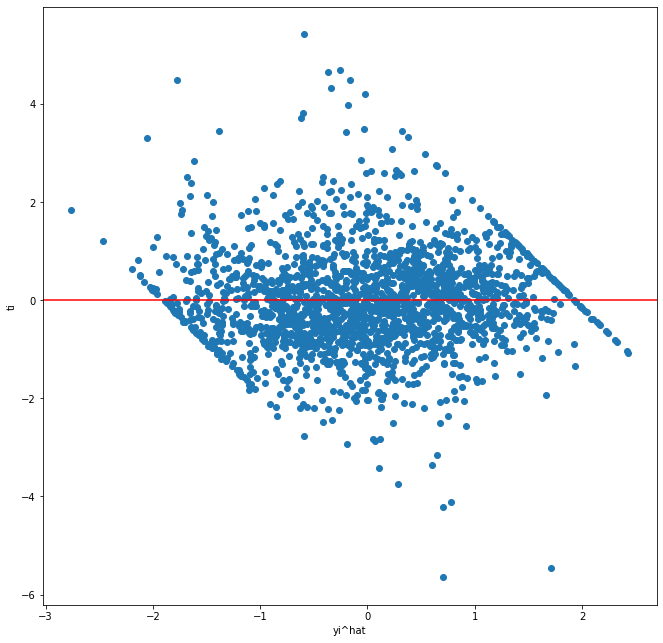

In [59]:
#plot R-student residuals

plt.figure(figsize = (9,9))

plt.scatter(Yhat.reshape(2000,1),ti)
plt.xlabel("yi^hat")
plt.ylabel('ti')
plt.axhline(y=0,c="red")

In [62]:
x = X_train[0:2000]

In [66]:
x = np.hstack((np.ones(2000).reshape(2000,1),x))

In [67]:
beta5 = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [68]:
yhat = x.dot(beta5)

In [69]:
SSRes = np.sum((y-yhat)**2)

In [70]:
ei = (y - yhat).reshape(2000,1)
H = x.dot(np.linalg.inv(x.T.dot(x))).dot(x.T)


Hii = np.diagonal(H).reshape(2000,1)
S2_i = ((SSRes - ei**2)/(1-Hii))/(2000-9-1)

ti = ei/np.sqrt(S2_i*(1-Hii))

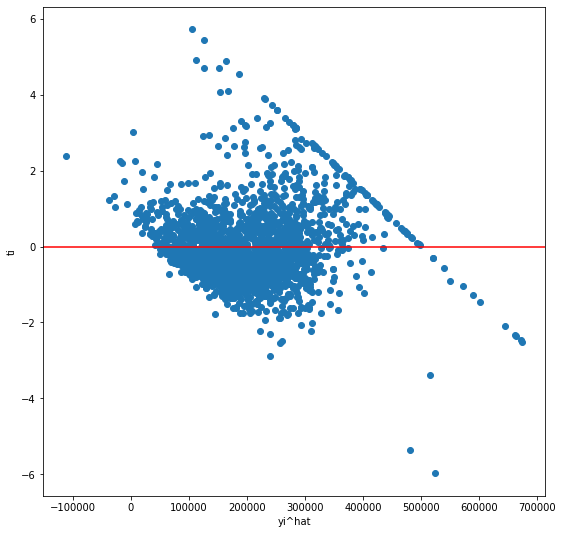

In [73]:
#plot R-student residuals

plt.figure(figsize = (9,9))

plt.scatter(yhat.reshape(2000,1),ti)
plt.xlabel("yi^hat")
plt.ylabel('ti')
plt.axhline(y=0,c="red")